# {Project Title}📝

![Banner](./assets/banner.jpeg)

## Topic
*What problem are you (or your stakeholder) trying to address?*
📝 <!-- Answer Below -->

Car Crash Rates - Car crash rates are increasingly on the rise so what are the major reasons for the number of crashes?

## Project Question
*What specific question are you seeking to answer with this project?*
*This is not the same as the questions you ask to limit the scope of the project.*
📝 <!-- Answer Below -->

What are the major factors that are causing an increase in car crashes?

## What would an answer look like?
*What is your hypothesized answer to your question?*
📝 <!-- Answer Below -->
My hypothesis is that texting and substance abuse are the leading causes of increased crashes.

## Data Sources
*What 3 data sources have you identified for this project?*
*How are you going to relate these datasets?*
📝 <!-- Answer Below -->

https://www.kaggle.com/datasets/joebeachcapital/car-crashes

https://crashviewer.nhtsa.dot.gov/CrashAPI  (There are several API calls that I will be utilizing here)

http://data.ctdata.org/dataset/motor-vehicle-accidents

I will be relating these data sets to identify commonalities amongst them to ensure accurate results.





## Approach and Analysis
*What is your approach to answering your project question?*
*How will you use the identified data to answer your project question?*
📝 <!-- Start Discussing the project here; you can add as many code cells as you need -->

This demonstrates the call, but I will be using the data to identify common trends as to what causes the most accidents and crashes.

In [24]:
# Start your code here

import requests

url = "https://crashviewer.nhtsa.dot.gov/CrashAPI/crashes/GetCaseList?states=1,51&fromYear=2014&toYear=2015&minNumOfVehicles=1&maxNumOfVehicles=6&format=json"

response = requests.get(url)

if response.status_code == 200:
    # The request was successful, and the response is in JSON format
    data = response.json()
    # Now you can work with the JSON data
    print(data)
else:
    print(f"Request failed with status code: {response.status_code}")

{'Count': 2898, 'Message': 'Results returned successfully', 'Results': [[{'CountyName': 'JACKSON (71)', 'CrashDate': '/Date(1388556900000-0500)/', 'Fatals': 1, 'Peds': 0, 'Persons': 2, 'St_Case': 10001, 'State': 1, 'StateName': 'Alabama', 'TotalVehicles': 1}, {'CountyName': 'FRANKLIN (59)', 'CrashDate': '/Date(1388601000000-0500)/', 'Fatals': 1, 'Peds': 0, 'Persons': 1, 'St_Case': 10002, 'State': 1, 'StateName': 'Alabama', 'TotalVehicles': 1}, {'CountyName': 'TUSCALOOSA (125)', 'CrashDate': '/Date(1388563620000-0500)/', 'Fatals': 2, 'Peds': 0, 'Persons': 7, 'St_Case': 10003, 'State': 1, 'StateName': 'Alabama', 'TotalVehicles': 2}, {'CountyName': 'TALLADEGA (121)', 'CrashDate': '/Date(1388671200000-0500)/', 'Fatals': 1, 'Peds': 0, 'Persons': 5, 'St_Case': 10004, 'State': 1, 'StateName': 'Alabama', 'TotalVehicles': 3}, {'CountyName': 'CULLMAN (43)', 'CrashDate': '/Date(1388698200000-0500)/', 'Fatals': 1, 'Peds': 0, 'Persons': 1, 'St_Case': 10005, 'State': 1, 'StateName': 'Alabama', 'Tota

## Checking to See if any Duplicate or Missing Values

In [25]:
# Checking for Duplicate and Missing Values for the cleanmotorvehicleaccidents.csv file
import pandas as pd

CMVAFilePath = 'cleanmotorvehicleaccidents.csv'
CMVAData = pd.read_csv(CMVAFilePath)

# Check for duplicates
CMVADuplicates = CMVAData[CMVAData.duplicated()]
if not CMVADuplicates.empty:
    print("Duplicate rows found:")
    print(CMVADuplicates)
else:
    print("No duplicate rows found.")

# Check for missing values
CMVAMissingValues = CMVAData.isnull().sum()
if CMVAMissingValues.sum() > 0:
    print("Columns with missing values:")
    print(CMVAMissingValues[CMVAMissingValues > 0])
else:
    print("No missing values found.")

No duplicate rows found.
No missing values found.


In [26]:
# Checking for Duplicate and Missing Values for the Motor_Vehicle_Collisions_-_Crashes.csv file
import pandas as pd

MVCCFilePath = 'Motor_Vehicle_Collisions_-_Crashes.csv'
MVCCData = pd.read_csv(MVCCFilePath)

# Check for duplicates
MVCCDuplicates = MVCCData[MVCCData.duplicated()]
if not MVCCDuplicates.empty:
    print("Duplicate rows found:")
    print(MVCCDuplicates)
else:
    print("No duplicate rows found.")

# Check for missing values
MVCCMissingValues = MVCCData.isnull().sum()
if MVCCMissingValues.sum() > 0:
    print("Columns with missing values:")
    print(MVCCMissingValues[MVCCMissingValues > 0])
else:
    print("No missing values found.")


C:\Users\flyin\AppData\Local\Temp\ipykernel_23484\2070819656.py:5: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  MVCCData = pd.read_csv(MVCCFilePath)


No duplicate rows found.
Columns with missing values:
BOROUGH                           633150
ZIP CODE                          633392
LATITUDE                          230979
LONGITUDE                         230979
LOCATION                          230979
ON STREET NAME                    429487
CROSS STREET NAME                 764111
OFF STREET NAME                  1698093
NUMBER OF PERSONS INJURED             18
NUMBER OF PERSONS KILLED              31
CONTRIBUTING FACTOR VEHICLE 1       6456
CONTRIBUTING FACTOR VEHICLE 2     311738
CONTRIBUTING FACTOR VEHICLE 3    1890578
CONTRIBUTING FACTOR VEHICLE 4    2002717
CONTRIBUTING FACTOR VEHICLE 5    2026414
VEHICLE TYPE CODE 1                12947
VEHICLE TYPE CODE 2               382514
VEHICLE TYPE CODE 3              1895677
VEHICLE TYPE CODE 4              2003807
VEHICLE TYPE CODE 5              2026681
dtype: int64


### Since there are a multitude of missing values, I decided to keep them since I felt they were not construing the actual data. While extra data may not be present, it doesn't mean that the accidents didn't happen.

In [27]:
import requests
import pandas as pd
from pandas.core.common import flatten

url = "https://crashviewer.nhtsa.dot.gov/CrashAPI/crashes/GetCaseList?states=1,51&fromYear=2014&toYear=2015&minNumOfVehicles=1&maxNumOfVehicles=6&format=json"

response = requests.get(url)

if response.status_code == 200:
    # The request was successful, and the response is in JSON format
    data = response.json()
    
    # Flatten the JSON data to handle potential nested structures
    flattenedData = list(flatten(data))

    # Convert flattened JSON data to a pandas DataFrame
    CVData = pd.DataFrame([flattenedData])
    
    # Check for duplicates
    CVDuplicates = CVData[CVData.duplicated()]
    if not CVDuplicates.empty:
        print("Duplicate rows found:")
        print(CVDuplicates)
    else:
        print("No duplicate rows found.")

    # Check for missing values
    CVMissingValues = CVData.isnull().sum()
    if CVMissingValues.sum() > 0:
        print("Columns with missing values:")
        print(CVMissingValues[CVMissingValues > 0])
    else:
        print("No missing values found.")
        
else:
    print(f"Request failed with status code: {response.status_code}")


No duplicate rows found.
No missing values found.


### The code below creates a chart for the number of accidents based on the abused substance.

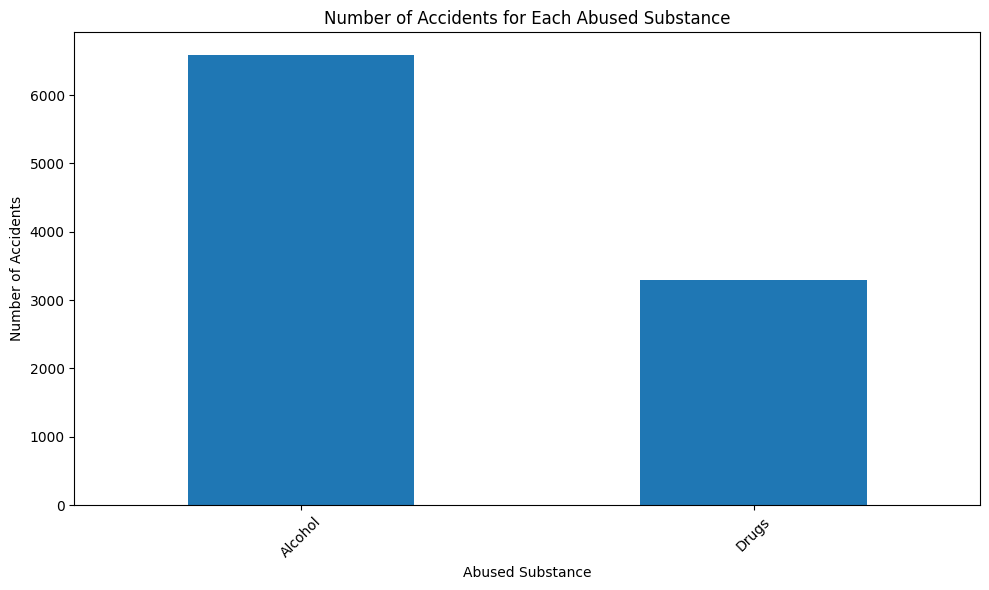

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

filePath = 'cleanmotorvehicleaccidents.csv'
data = pd.read_csv(filePath)

# Count occurrences of each 'Abused Substance'
substance_counts = data['Abused Substance'].value_counts()

plt.figure(figsize=(10, 6))
substance_counts.plot(kind='bar')
plt.title('Number of Accidents for Each Abused Substance')
plt.xlabel('Abused Substance')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### This chart goes even further beyond and breaks down crashes into more specific categories. I chose a histogram because it suits the type of data I wish to display

C:\Users\flyin\AppData\Local\Temp\ipykernel_23484\2051693944.py:5: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(filePath)


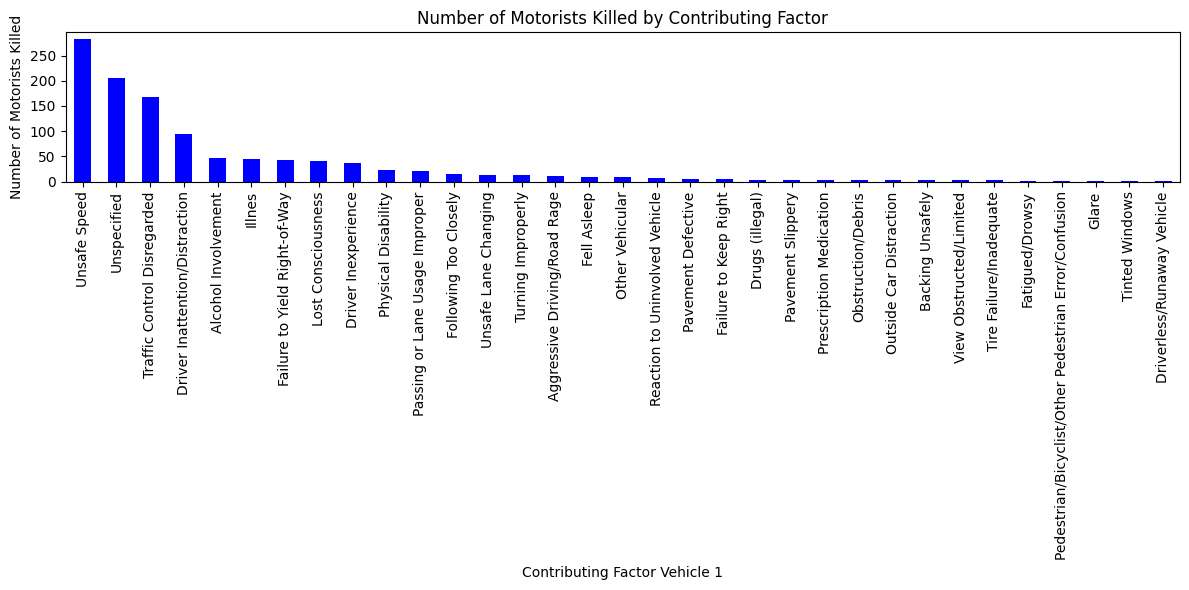

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

filePath = 'Motor_Vehicle_Collisions_-_Crashes.csv'
data = pd.read_csv(filePath)

# Group by 'CONTRIBUTING FACTOR VEHICLE 1' and count occurrences of fatalities
fatalities_per_factor = data['CONTRIBUTING FACTOR VEHICLE 1'].loc[data['NUMBER OF MOTORIST KILLED'] > 0].value_counts()

plt.figure(figsize=(12, 6))
fatalities_per_factor.plot(kind='bar', color='blue')
plt.title('Number of Motorists Killed by Contributing Factor')
plt.xlabel('Contributing Factor Vehicle 1')
plt.ylabel('Number of Motorists Killed')
plt.xticks(rotation=90)
plt.yticks(range(0, max(fatalities_per_factor)+1, 50))
plt.tight_layout()
plt.show()


### Again, I used a Bar Graph to easily show the number of deaths per Borough. Surprisingly, the most deaths occurred in Brooklyn and Queens instead of Manhattan, which is what I originally guessed would be the highest.

C:\Users\flyin\AppData\Local\Temp\ipykernel_23484\4104139769.py:5: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(filePath)


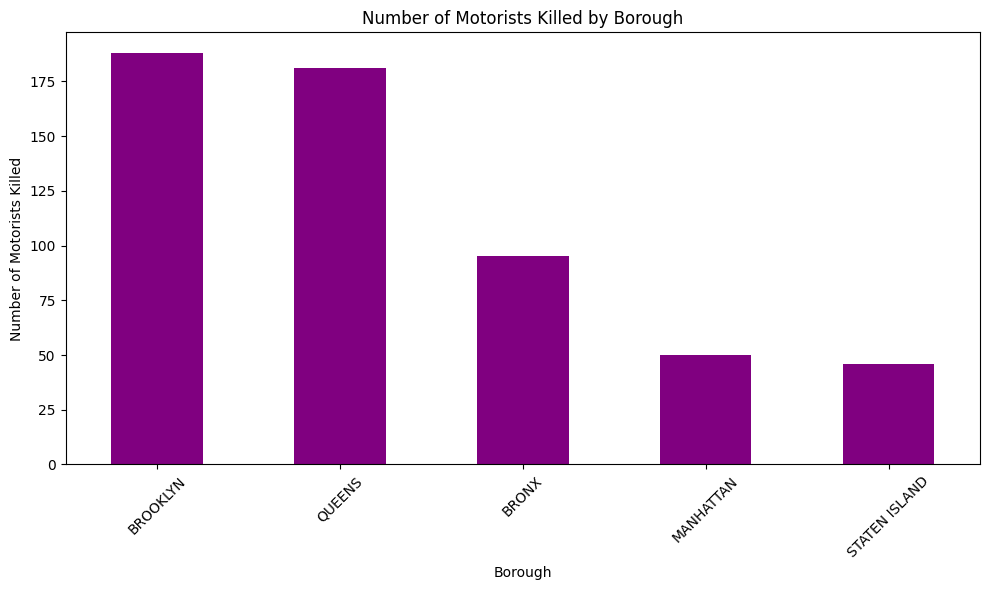

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

filePath = 'Motor_Vehicle_Collisions_-_Crashes.csv'
data = pd.read_csv(filePath)

killed_motorists_data = data[data['NUMBER OF MOTORIST KILLED'] > 0]

killed_per_borough = killed_motorists_data['BOROUGH'].value_counts()

plt.figure(figsize=(10, 6))
killed_per_borough.plot(kind='bar', color='purple')
plt.title('Number of Motorists Killed by Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Motorists Killed')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### This chart shows that the more fatalaties occur when there are more people in the vehicle. I had a lot of issues with the API call (hence the try/except) but I was able to narrow down the call with the right parameters being passed.

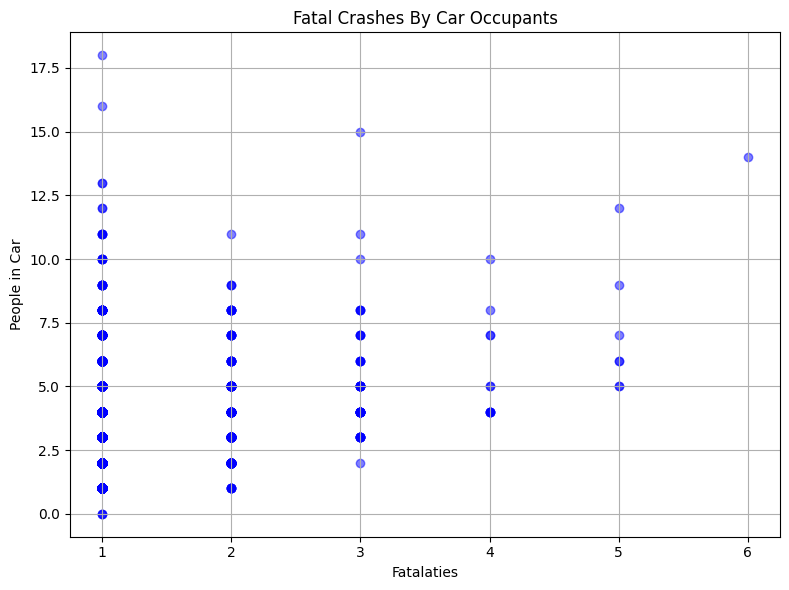

In [31]:
import requests
import matplotlib.pyplot as plt

url = "https://crashviewer.nhtsa.dot.gov/CrashAPI/crashes/GetCaseList"

# Parameters for the API call
params = {
    'states': '1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51',
    'fromYear': '2014',
    'toYear': '2015',
    'minNumOfVehicles': '1',
    'maxNumOfVehicles': '6',
    'format': 'json'
}

try:
    response = requests.get(url, params=params)

    if response.status_code == 200:
   
        data = response.json()

        # Get 'fatals' and 'persons' columns data
        fatals = []
        persons = []

        # Get 'fatals' and 'persons' from nested lists of dictionaries
        for sublist in data['Results']:
            for entry in sublist:
                if 'Fatals' in entry and 'Persons' in entry:
                    fatals.append(entry['Fatals'])
                    persons.append(entry['Persons'])

        # Time to plot
        plt.figure(figsize=(8, 6))
        plt.scatter(fatals, persons, color='blue', alpha=0.5)
        plt.title('Fatal Crashes By Car Occupants')
        plt.xlabel('Fatalaties')
        plt.ylabel('People in Car')
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Request failed with status code: {response.status_code}")

except requests.RequestException as e:
    print(f"Request failed: {e}")


#### The next few blocks of code are all about creating test and training sets of data. This one in specific applies to the Motor_Vehicle_Collisions_-_Crashes.csv

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Load the data from the CSV file - only first 5000 rows.
file_path = 'Motor_Vehicle_Collisions_-_Crashes.csv'
columns_to_use = ['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'LATITUDE', 'LONGITUDE', 'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5']
data = pd.read_csv(file_path, usecols=columns_to_use, nrows=5000)

features = data.drop('CRASH DATE', axis=1)  # Remove 'CRASH DATE' due to type issues
target = data['NUMBER OF PERSONS INJURED'] 

# 80% training, 20% test
train_features, test_features, train_target, test_target = train_test_split(features, target, test_size=0.2, random_state=42)


numeric_features = ['LATITUDE', 'LONGITUDE', 'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED']
numeric_transform = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_features = ['CRASH TIME', 'BOROUGH', 'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5']
categorical_transform = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transform, numeric_features),
        ('cat', categorical_transform, categorical_features)
    ])

# Create a pipeline 
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier() 

# full pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

# training data
pipeline.fit(train_features, train_target)

# test data
accuracy = pipeline.score(test_features, test_target)
print(f"Accuracy on test set: {accuracy}")


Accuracy on test set: 0.988


#### Here we create a bar graph that displays which time of day a crash is more likely to occur. The lighter color resembles an injury while the darker color resembles a death.

C:\Users\flyin\AppData\Local\Temp\ipykernel_23484\3825487722.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['CRASH TIME'] = pd.to_datetime(data['CRASH TIME'])
C:\Users\flyin\AppData\Local\Temp\ipykernel_23484\3825487722.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TIME INTERVAL', y='NUMBER OF PERSONS INJURED', data=time_injuries, palette='pastel')
C:\Users\flyin\AppData\Local\Temp\ipykernel_23484\3825487722.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TIME INTERVAL', y='NUMBER OF PERSONS KILLED', data=time_injuries, pale

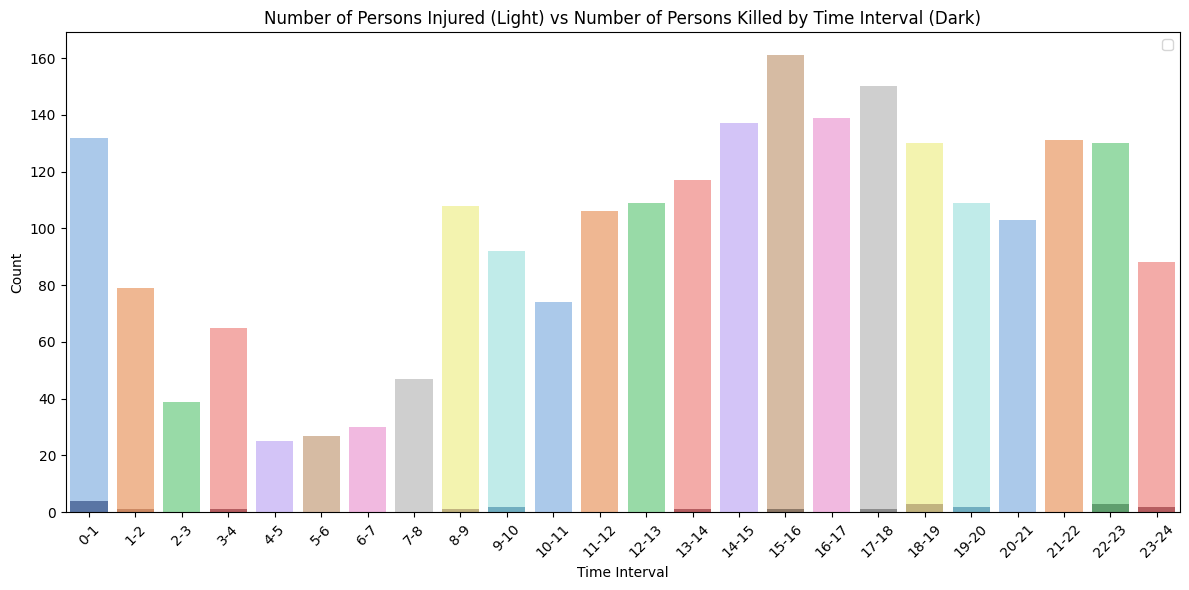

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'CRASH TIME' to datetime
data['CRASH TIME'] = pd.to_datetime(data['CRASH TIME'])

# Extract hour from 'CRASH TIME'
data['CRASH HOUR'] = data['CRASH TIME'].dt.hour

# Define custom intervals (1-hour intervals in military time)
custom_intervals = [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8),
                    (8, 9), (9, 10), (10, 11), (11, 12), (12, 13), (13, 14), (14, 15),
                    (15, 16), (16, 17), (17, 18), (18, 19), (19, 20), (20, 21), (21, 22), (22, 23), (23, 24)]

# Function to map hour to custom intervals
def map_to_intervals(hour):
    for interval in custom_intervals:
        if hour in range(interval[0], interval[1]):
            return f"{interval[0]}-{interval[1]}"

# Apply the function to create intervals based on hours
data['TIME INTERVAL'] = data['CRASH HOUR'].apply(map_to_intervals)

# Extracting required columns for plotting
time_injuries = data[['TIME INTERVAL', 'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED']]

# Grouping by 'TIME INTERVAL' and summing the injuries and fatalities
time_injuries = time_injuries.groupby('TIME INTERVAL').sum().reset_index()

# Define the categorical order of time intervals
interval_order = [f"{interval[0]}-{interval[1]}" for interval in custom_intervals]

# Convert 'TIME INTERVAL' column to categorical with defined order
time_injuries['TIME INTERVAL'] = pd.Categorical(time_injuries['TIME INTERVAL'], categories=interval_order, ordered=True)

# Sort the DataFrame by the categorical column order
time_injuries = time_injuries.sort_values('TIME INTERVAL')

# Plotting the counts of injuries and fatalities based on custom time intervals
plt.figure(figsize=(12, 6))
sns.barplot(x='TIME INTERVAL', y='NUMBER OF PERSONS INJURED', data=time_injuries, palette='pastel')
sns.barplot(x='TIME INTERVAL', y='NUMBER OF PERSONS KILLED', data=time_injuries, palette='deep')
plt.xlabel('Time Interval')
plt.ylabel('Count')
plt.title('Number of Persons Injured (Light) vs Number of Persons Killed by Time Interval (Dark)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


#### This is another test/train set, but applies to the cleanmotorvehicleaccidents.csv file.

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


file_path = 'cleanmotorvehicleaccidents.csv'
columns_to_use = ['Town', 'FIPS', 'Year', 'Abused Substance', 'Outcome', 'Measure Type', 'Variable', 'Value']
data = pd.read_csv(file_path, usecols=columns_to_use)

# Define features and target variable
features = data.drop('Outcome', axis=1)  # Assuming 'Outcome' is the target variable
target = data['Outcome']

# Split the data into training and test sets
train_features, test_features, train_target, test_target = train_test_split(features, target, test_size=0.2, random_state=42)

# Preprocessing pipelines 
numeric_features = ['Year', 'Value']  
numeric_transform = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_features = ['Town', 'FIPS', 'Abused Substance', 'Measure Type', 'Variable']  
categorical_transform = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing 
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transform, numeric_features),
        ('cat', categorical_transform, categorical_features)
    ])

# Define the model
model = RandomForestClassifier()

# Create the full pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

# Fit the pipeline on the training data
pipeline.fit(train_features, train_target)

# Evaluate the pipeline on the test data
predictions = pipeline.predict(test_features)
accuracy = accuracy_score(test_target, predictions)
print(f"Accuracy on test set: {accuracy}")
print("Training Features:")
print(train_features.head())  # Display the first few rows of the training features
print("\nTraining Target:")
print(train_target.head())  # Display the first few rows of the training target

print("\nTest Features:")
print(test_features.head())  # Display the first few rows of the test features
print("\nTest Target:")
print(test_target.head())  # Display the first few rows of the test target



Accuracy on test set: 0.9600404653515427
Training Features:
                                               Town           FIPS  Year  \
9787                                      Naugatuck      900949950  2010   
5121                 Substance Abuse Action Council  9000000000022  2002   
6398  Northeast Communities Against Substance Abuse  9000000000018  2009   
6827                                         Granby      900332640  2003   
5758                                         Monroe      900148620  2006   

     Abused Substance        Measure Type       Variable  Value  
9787            Drugs  Rate (per 100,000)  Motor Vehicle   0.00  
5121          Alcohol  Rate (per 100,000)  Motor Vehicle   4.36  
6398          Alcohol  Rate (per 100,000)  Motor Vehicle   5.63  
6827            Drugs              Number  Motor Vehicle   0.00  
5758          Alcohol  Rate (per 100,000)  Motor Vehicle   5.20  

Training Target:
9787    Motor vehicle accident fatalities
5121    Motor vehicle accid

#### This chart is linked to the above data. It displays, in a visual format, the differences in accuracy between the two sets.

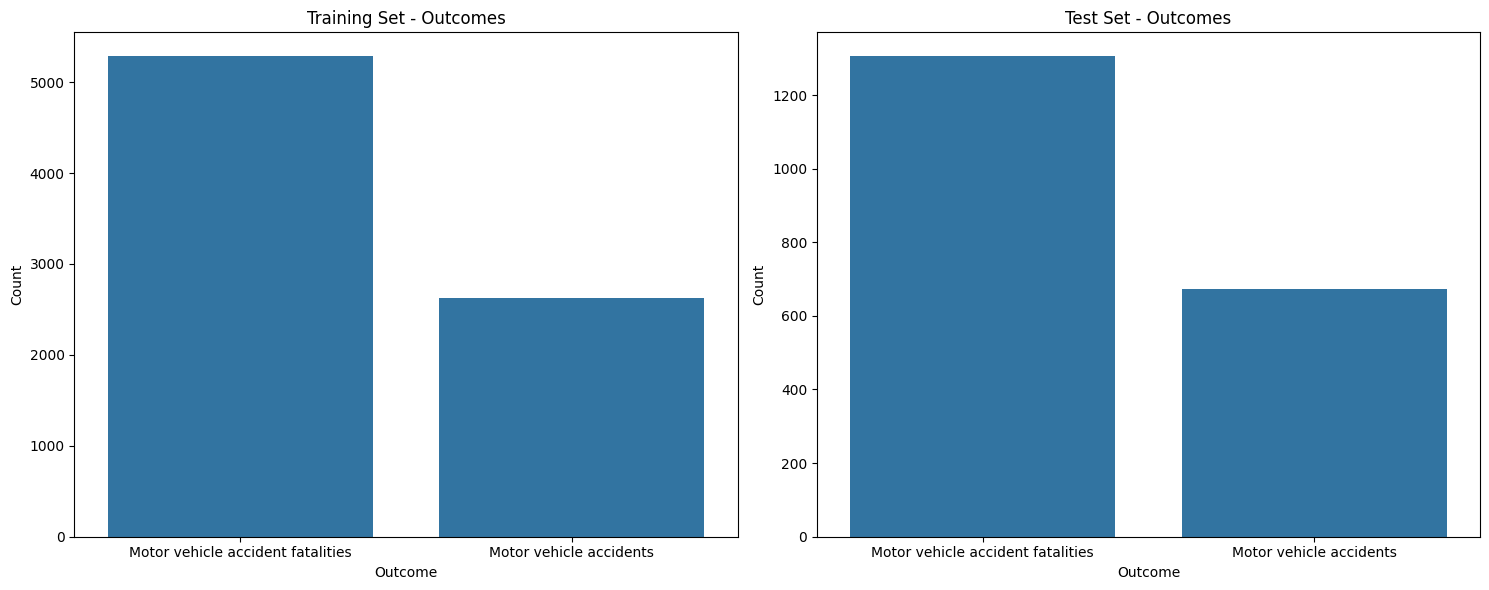

In [35]:
train_predictions = pipeline.predict(train_features)
test_predictions = pipeline.predict(test_features)

# Calculate accuracies
train_accuracy = accuracy_score(train_target, train_predictions)
test_accuracy = accuracy_score(test_target, test_predictions)

train_results = pd.DataFrame({'Outcome': train_target, 'Prediction': train_predictions})
test_results = pd.DataFrame({'Outcome': test_target, 'Prediction': test_predictions})

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plotting for training set
sns.countplot(x='Outcome', data=train_results, ax=axes[0])
axes[0].set_title('Training Set - Outcomes')
axes[0].set_xlabel('Outcome')
axes[0].set_ylabel('Count')

# Plotting for test set
sns.countplot(x='Outcome', data=test_results, ax=axes[1])
axes[1].set_title('Test Set - Outcomes')
axes[1].set_xlabel('Outcome')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

#### This is our last source that we are using. It creates a test/training set but via the API source called crashviewer. Additionally, it displays the differences between the sets and displays similarities. The more purple a dot is, the more that the two sets converged.

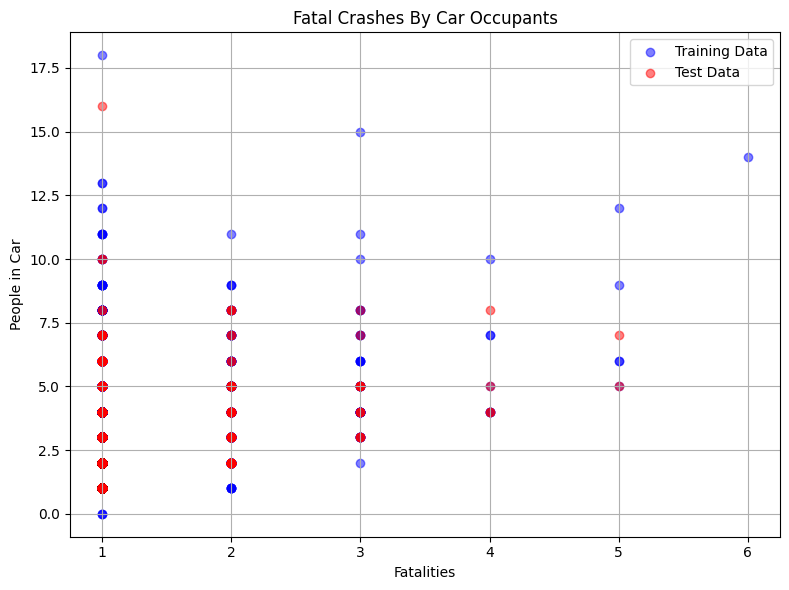

In [36]:
import requests
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

url = "https://crashviewer.nhtsa.dot.gov/CrashAPI/crashes/GetCaseList"

# Parameters for the API call
params = {
    'states': '1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51',
    'fromYear': '2014',
    'toYear': '2015',
    'minNumOfVehicles': '1',
    'maxNumOfVehicles': '6',
    'format': 'json'
}

try:
    response = requests.get(url, params=params)

    if response.status_code == 200:
        data = response.json()

        fatals = []
        persons = []

        # Get 'fatals' and 'persons' from nested lists of dictionaries
        for sublist in data['Results']:
            for entry in sublist:
                if 'Fatals' in entry and 'Persons' in entry:
                    fatals.append(entry['Fatals'])
                    persons.append(entry['Persons'])

        # Split the data into training and test sets
        fatals_train, fatals_test, persons_train, persons_test = train_test_split(fatals, persons, test_size=0.2, random_state=42)

        # Plotting for both training and test data
        plt.figure(figsize=(8, 6))
        plt.scatter(fatals_train, persons_train, color='blue', alpha=0.5, label='Training Data')
        plt.scatter(fatals_test, persons_test, color='red', alpha=0.5, label='Test Data')
        plt.title('Fatal Crashes By Car Occupants')
        plt.xlabel('Fatalities')
        plt.ylabel('People in Car')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Request failed with status code: {response.status_code}")

except requests.RequestException as e:
    print(f"Request failed: {e}")


## Resources and References
*What resources and references have you used for this project?*
📝 <!-- Answer Below -->
Stack Overflow, Python Documentation, the API information from the site at the top, Geeks for Geeks, various forums, W3Schools, Sklearn model documentation

In [37]:
# ⚠️ Make sure you run this cell at the end of your notebook before every submission!
!jupyter nbconvert --to python source.ipynb

[NbConvertApp] Converting notebook source.ipynb to python
[NbConvertApp] Writing 20395 bytes to source.py
